# Evaluation Metrics

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn import metrics

In [2]:
y_pred = [0, 1, 0, 0]

In [3]:
y_true = [0, 1, 0, 1]

Accuracy

In [4]:
metrics.accuracy_score(y_true, y_pred)

0.75

Error

In [5]:
1 - metrics.accuracy_score(y_true, y_pred)

0.25

Precision (TP/TP+FP)

In [6]:
metrics.precision_score(y_true, y_pred)

1.0

Recall (TP/TP+FN)

In [7]:
metrics.recall_score(y_true, y_pred)

0.5

F1

In [8]:
metrics.f1_score(y_true, y_pred)

0.6666666666666666

# Confusion Matrix

In [9]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [10]:
iris = datasets.load_iris()
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [11]:
clf = svm.SVC(kernel='linear')

In [12]:
X, y = iris.data, iris.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


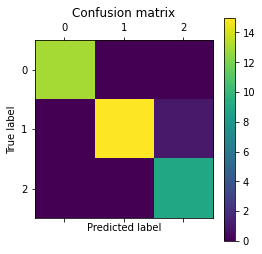

In [15]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Cross-Validation

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
scores = cross_val_score(clf, iris.data, iris.target, scoring='accuracy', cv=5)

In [18]:
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [19]:
scores.mean()

0.9800000000000001

In [20]:
scores = cross_val_score(clf, iris.data, iris.target, scoring='f1_macro', cv=5)

In [21]:
scores

array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

In [22]:
scores.mean()

0.9799498746867169

# Pipeline & Cross validation score & Predict

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [24]:
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC())
cross_val_score(clf, iris.data, iris.target, cv=5)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [25]:
from sklearn.model_selection import cross_val_predict
clf = svm.SVC(kernel='linear')
y_pred = cross_val_predict(clf, iris.data, iris.target, cv=5)

In [26]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# A classification example

Breast Cancer Wisconsin (Diagnostic) Data Set
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', 
                 header=None)

In [29]:
df.shape

(569, 32)

In [30]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Split features and the label

In [31]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

## Split into  training and test sets

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

## Combining transformers and estimators in a pipeline

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression())

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

In [34]:
metrics.accuracy_score(y_test, y_pred)

0.9649122807017544

## Using k-fold cross validation to assess model performance

### CV from scratch

In [35]:
from sklearn.model_selection import StratifiedKFold
    
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold {} Accuracy: {}'.format(k+1, score))
    
print('\nCV accuracy: mean {}, std {}'.format(np.mean(scores), np.std(scores)))

Fold 1 Accuracy: 0.9782608695652174
Fold 2 Accuracy: 0.9347826086956522
Fold 3 Accuracy: 0.9782608695652174
Fold 4 Accuracy: 1.0
Fold 5 Accuracy: 0.9347826086956522
Fold 6 Accuracy: 0.9777777777777777
Fold 7 Accuracy: 0.9777777777777777
Fold 8 Accuracy: 1.0
Fold 9 Accuracy: 0.9333333333333333
Fold 10 Accuracy: 0.9777777777777777

CV accuracy: mean 0.9692753623188406, std 0.024367371956677097


### In scikit-learn

In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10)
print('CV accuracy scores: {}'.format(scores))
print('CV accuracy: {}, {}'.format(np.mean(scores), np.std(scores)))

CV accuracy scores: [0.97826087 0.93478261 0.97826087 1.         0.93478261 0.97777778
 0.97777778 1.         0.93333333 0.97777778]
CV accuracy: 0.9692753623188406, 0.024367371956677097


## Learning Curves

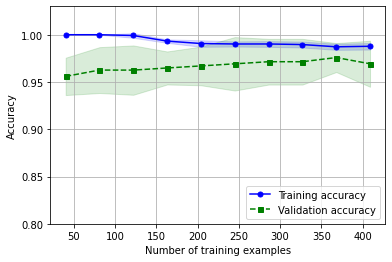

In [37]:
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=42))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=X_train, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o',
         markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--',marker='s', 
         markersize=5,label='Validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()

## Validation Cuves

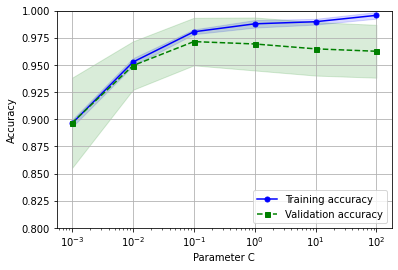

In [38]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr, 
                                             X=X_train, y=y_train, 
                                             param_name='logisticregression__C', 
                                             param_range=param_range,
                                             cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, 
                 alpha=0.15,color='blue')

plt.plot(param_range, test_mean, color='green', linestyle='--', 
         marker='s', markersize=5, label='Validation accuracy')

plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

## Fine-tuning machine learning models via grid search

### Find the best hyperparameters

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=42))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator = pipe_svc, 
                  param_grid = param_grid, 
                  scoring='accuracy',
                  #refit=True,
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9757004830917875
{'svc__C': 100.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


### Refit with the best hyperparameters

In [40]:
clf = gs.best_estimator_
clf.fit(X_train, y_train) 
clf.score(X_test, y_test)

0.956140350877193

## Plotting a receiver operating characteristics (ROC curve)

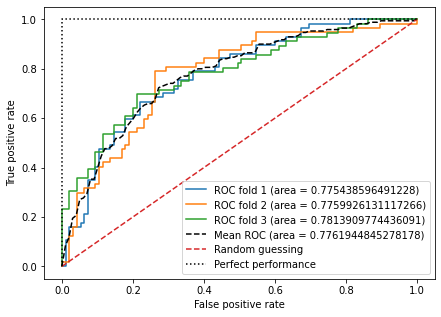

In [42]:
from sklearn.metrics import roc_curve, auc
from numpy import interp

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=42, C=100.0))

X_train2 = X_train[:, [4, 14]]

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))
fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,label='ROC fold {} (area = {})'.format(i+1, roc_auc))


mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, 'k--',label='Mean ROC (area = {})'.format(mean_auc, lw=2))
plt.plot([0, 1],[0, 1], linestyle='--', label='Random guessing')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='black', label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.show()